# Lab 8: Implement Your Machine Learning Project Plan

In this lab assignment, you will implement the machine learning project plan you created in the written assignment. You will:

1. Load your data set and save it to a Pandas DataFrame.
2. Perform exploratory data analysis on your data to determine which feature engineering and data preparation techniques you will use.
3. Prepare your data for your model and create features and a label.
4. Fit your model to the training data and evaluate your model.
5. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.

### Import Packages

Before you get started, import a few packages.

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need for this task.

## Part 1: Load the Data Set


You have chosen to work with one of four data sets. The data sets are located in a folder named "data." The file names of the three data sets are as follows:

* The "adult" data set that contains Census information from 1994 is located in file `adultData.csv`
* The airbnb NYC "listings" data set is located in file  `airbnbListingsData.csv`
* The World Happiness Report (WHR) data set is located in file `WHR2018Chapter2OnlineData.csv`
* The book review data set is located in file `bookReviewsData.csv`



<b>Task:</b> In the code cell below, use the same method you have been using to load your data using `pd.read_csv()` and save it to DataFrame `df`.

In [3]:
#Load in the data and assign it the dataframe('df') variable
df = pd.read_csv("data/WHR2018Chapter2OnlineData.csv")

In [4]:
#Look over the data to check of missingness, outliers,etc.
print(df)

          country  year  Life Ladder  Log GDP per capita  Social support  \
0     Afghanistan  2008     3.723590            7.168690        0.450662   
1     Afghanistan  2009     4.401778            7.333790        0.552308   
2     Afghanistan  2010     4.758381            7.386629        0.539075   
3     Afghanistan  2011     3.831719            7.415019        0.521104   
4     Afghanistan  2012     3.782938            7.517126        0.520637   
...           ...   ...          ...                 ...             ...   
1557     Zimbabwe  2013     4.690188            7.565154        0.799274   
1558     Zimbabwe  2014     4.184451            7.562753        0.765839   
1559     Zimbabwe  2015     3.703191            7.556052        0.735800   
1560     Zimbabwe  2016     3.735400            7.538829        0.768425   
1561     Zimbabwe  2017     3.638300            7.538187        0.754147   

      Healthy life expectancy at birth  Freedom to make life choices  \
0              

## Part 2: Exploratory Data Analysis

The next step is to inspect and analyze your data set with your machine learning problem and project plan in mind. 

This step will help you determine data preparation and feature engineering techniques you will need to apply to your data to build a balanced modeling data set for your problem and model. These data preparation techniques may include:
* addressing missingness, such as replacing missing values with means
* renaming features and labels
* finding and replacing outliers
* performing winsorization if needed
* performing one-hot encoding on categorical features
* performing vectorization for an NLP problem
* addressing class imbalance in your data sample to promote fair AI


Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.


<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. 

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

In [5]:
#Check the types of data held within each column of dataframe with dtypes property
#We can see the 'country' column is made up of objects. This because the country column
#is occupied by strings "Afghanistan... Zimbabwe" which are objects.
df.dtypes

country                                                      object
year                                                          int64
Life Ladder                                                 float64
Log GDP per capita                                          float64
Social support                                              float64
Healthy life expectancy at birth                            float64
Freedom to make life choices                                float64
Generosity                                                  float64
Perceptions of corruption                                   float64
Positive affect                                             float64
Negative affect                                             float64
Confidence in national government                           float64
Democratic Quality                                          float64
Delivery Quality                                            float64
Standard deviation of ladder by country-year    

In [29]:
#Use describe propety to get insight into key statistics for each column
df.describe

<bound method NDFrame.describe of       year  Life Ladder  Log GDP per capita  Social support  \
0     2008     3.723590            7.168690        0.450662   
1     2009     4.401778            7.333790        0.552308   
2     2010     4.758381            7.386629        0.539075   
3     2011     3.831719            7.415019        0.521104   
4     2012     3.782938            7.517126        0.520637   
...    ...          ...                 ...             ...   
1557  2013     4.690188            7.565154        0.799274   
1558  2014     4.184451            7.562753        0.765839   
1559  2015     3.703191            7.556052        0.735800   
1560  2016     3.735400            7.538829        0.768425   
1561  2017     3.638300            7.538187        0.754147   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                            49.209663                      0.718114   
1                            49.624432                      0.678

In [2]:
# Import OneHotEncoder to represent the strings in the country column as numbers
from sklearn.preprocessing import OneHotEncoder

In [6]:
#Use the select_dtypes() method to identify and list all the columns that have 
#the data type 'object'. Store the list in 'to_encode' variable.

to_encode = df.select_dtypes(include ='object').columns.tolist() 


In [7]:
#Performing OneHotEncoder on catergorcial features
# Create the encoder:
encoder = OneHotEncoder(handle_unknown="error", sparse=False)

# Apply the encoder:
df_enc = pd.DataFrame(encoder.fit_transform(df[to_encode]))

# Reinstate the original column names:
df_enc.columns = encoder.get_feature_names(to_encode)

#drop the columns that have the data type 'object'
df.drop(columns = to_encode ,axis=1, inplace=True)

#Join the updated dataframe with the encoded dataframe. Store in dataframe variable('df')
df = df.join(df_enc)

In [8]:
#Check dataframe to make sure objects were properly encoded
print(df)

      year  Life Ladder  Log GDP per capita  Social support  \
0     2008     3.723590            7.168690        0.450662   
1     2009     4.401778            7.333790        0.552308   
2     2010     4.758381            7.386629        0.539075   
3     2011     3.831719            7.415019        0.521104   
4     2012     3.782938            7.517126        0.520637   
...    ...          ...                 ...             ...   
1557  2013     4.690188            7.565154        0.799274   
1558  2014     4.184451            7.562753        0.765839   
1559  2015     3.703191            7.556052        0.735800   
1560  2016     3.735400            7.538829        0.768425   
1561  2017     3.638300            7.538187        0.754147   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                            49.209663                      0.718114   
1                            49.624432                      0.678896   
2                          

In [9]:
#addressing missingness, such as replacing missing values with means
for column in df.columns:
    if df[column].isnull().any():
        column_mean = df[column].mean()
        df[column].fillna(column_mean, inplace=True)    

In [30]:
#Check dataframe to make sure missing values were replaced
print(df)

      year  Life Ladder  Log GDP per capita  Social support  \
0     2008     3.723590            7.168690        0.450662   
1     2009     4.401778            7.333790        0.552308   
2     2010     4.758381            7.386629        0.539075   
3     2011     3.831719            7.415019        0.521104   
4     2012     3.782938            7.517126        0.520637   
...    ...          ...                 ...             ...   
1557  2013     4.690188            7.565154        0.799274   
1558  2014     4.184451            7.562753        0.765839   
1559  2015     3.703191            7.556052        0.735800   
1560  2016     3.735400            7.538829        0.768425   
1561  2017     3.638300            7.538187        0.754147   

      Healthy life expectancy at birth  Freedom to make life choices  \
0                            49.209663                      0.718114   
1                            49.624432                      0.678896   
2                          

## Part 3: Implement Your Project Plan

<b>Task:</b> Use the rest of this notebook to carry out your project plan. You will:

1. Prepare your data for your model and create features and a label.
2. Fit your model to the training data and evaluate your model.
3. Improve your model by performing model selection and/or feature selection techniques to find best model for your problem.


Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

In [11]:
#Import necessary packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

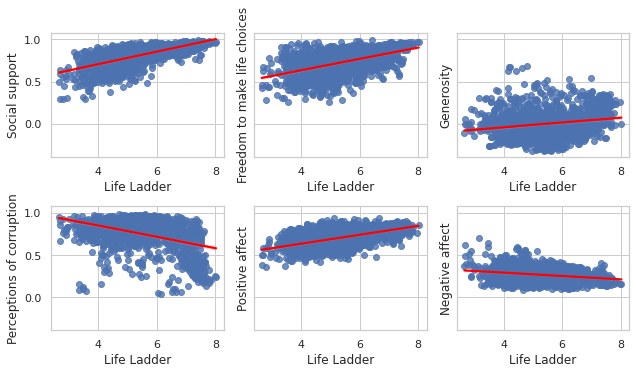

In [25]:
#Create a subplot of each feature vs. our target variable('Life Ladder')
#with seaborn regplot function.

fig, axes = plt.subplots(2,3, figsize = (9,5), sharey = True)
sns.regplot(x='Life Ladder', y='Social support', data=df, ax = axes[0,0], line_kws={"color": "red"});
sns.regplot(x='Life Ladder', y='Freedom to make life choices', data=df, ax = axes[0,1], line_kws={"color": "red"});
sns.regplot(x='Life Ladder', y='Generosity', data=df, ax = axes[0,2], line_kws={"color": "red"});
sns.regplot(x='Life Ladder', y='Perceptions of corruption', data=df, ax = axes[1,0], line_kws={"color": "red"});
sns.regplot(x='Life Ladder', y='Positive affect', data=df, ax = axes[1,1], line_kws={"color": "red"});
sns.regplot(x='Life Ladder', y='Negative affect', data=df, ax = axes[1,2], line_kws={"color": "red"});
fig.tight_layout()

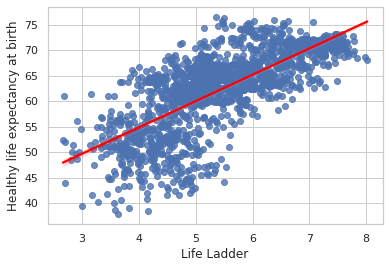

In [26]:
#Create a seperate scatter plot for 'Healthy life expectancy at birth' 
#because of higher range of values.

sns.regplot(x='Life Ladder', y='Healthy life expectancy at birth', data=df, line_kws={"color": "red"});

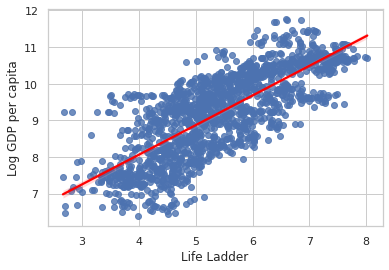

In [27]:
#Create a seperate scatter plot for 'Log GDP per capita' 
#because of higher range of values.

sns.regplot(x='Life Ladder', y='Log GDP per capita', data=df, line_kws={"color": "red"});

In [15]:
#Train Life Ladder data and LogGDP

#Set X and y variables
X_LifeLadder = df['Life Ladder'].to_frame()
y_LogGDP = df['Log GDP per capita']

#Split data into training and testing sets for both variables, (70% training, 30% testing)
XLL_train, XLL_test, yLG_train, yLG_test = train_test_split(X_LifeLadder, y_LogGDP, test_size=0.3, random_state=1234)

#Instantiate Linear Regression model and fit the data to the training dataset 
model_example = LinearRegression()
model_example.fit(XLL_train, yLG_train)

#Make prediction on the testing set of the target variable 
prediction1 = model_example.predict(XLL_test)


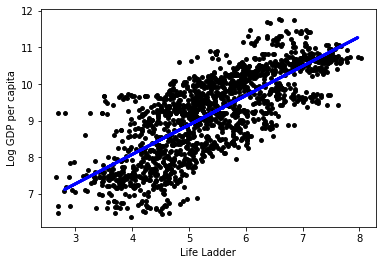

In [16]:
#Display scatterplot which shows the prediction of our model on the 
# testing set.
plt.scatter(X_LifeLadder,y_LogGDP,color='black',s=15);

plt.plot(XLL_test, prediction1, color='blue', linewidth=3);

plt.xlabel('Life Ladder');
plt.ylabel('Log GDP per capita');

In [17]:
#To see the performance of the model on the entire dataframe. 
#First store all features in an array called 'feature list'. 
feature_list = ['Log GDP per capita', 'Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity', 'Perceptions of corruption','Positive affect', 'Negative affect']

In [18]:
#Set with X and y
X = df[feature_list]
y = df['Life Ladder']

In [19]:
#Split data into training and testing sets for both variables, (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [20]:
#Set up linear regression model

# Create the  LinearRegression model object 
regr_model = LinearRegression()

# Fit the model to the training data 
regr_model.fit(X_train, y_train)

#  Make predictions on the test data 
prediction = regr_model.predict(X_test)


[5.88409319 5.07525687 6.2886571  3.95138926 3.709913   5.93643179
 5.63953653 5.39639428 6.69728578 6.0865697  5.47472494 5.15103971
 5.90543143 5.34314436 5.16756835 6.08886777 5.39166312 7.18606771
 5.1981841  5.6211916  5.42154541 5.61525047 4.44200961 7.10813042
 5.6735412  4.10228018 6.42749699 5.16295317 5.11705666 7.03671966
 5.3037553  4.7317873  6.32028851 3.72390923 6.45540665 4.59225182
 4.03582728 4.90787271 5.02065862 6.16577664 4.54426298 5.29789186
 4.60168555 4.69458923 7.07249154 7.16133565 4.28184942 3.59490995
 4.97114598 5.49337355 7.05009335 4.78808697 5.53409933 3.79981928
 4.91454321 5.26755886 6.24471293 5.67810678 7.17695071 6.17806201
 4.31894778 4.54316965 5.84356199 5.97100321 4.90009623 4.79033918
 4.7410112  5.70687554 7.12281751 7.09411626 4.03556248 5.28882525
 6.2162993  3.78961421 4.80937949 6.37597254 4.6826985  5.03489489
 5.29989656 4.00112319 4.95990821 7.25058451 5.69006456 4.5065425
 4.82310667 6.62711778 5.99941694 5.9273121  4.87276349 5.24732

In [21]:
#Model Summary

print('Model Summary:\n')

# Print intercept (alpha)
print('Intercept:')
print('alpha = ' , regr_model.intercept_)

# Print weights: The weights of each feature show the influence that feature has on the predicted outcome
print('\nWeights:')
i = 0
for w in regr_model.coef_:
    print('w_',i+1,'= ', w, ' [ weight of ', feature_list[i],']')
    i += 1

Model Summary:

Intercept:
alpha =  -2.446648953433426

Weights:
w_ 1 =  0.33975329865103926  [ weight of  Log GDP per capita ]
w_ 2 =  2.0661331610061593  [ weight of  Social support ]
w_ 3 =  0.027193429332156516  [ weight of  Healthy life expectancy at birth ]
w_ 4 =  0.5199891757972698  [ weight of  Freedom to make life choices ]
w_ 5 =  0.32246076527120865  [ weight of  Generosity ]
w_ 6 =  -0.6022727957518755  [ weight of  Perceptions of corruption ]
w_ 7 =  2.0604541049289984  [ weight of  Positive affect ]
w_ 8 =  -0.04699378280511053  [ weight of  Negative affect ]


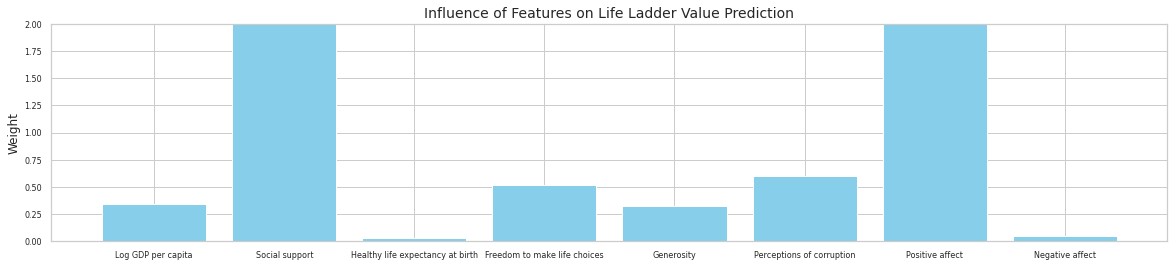

In [22]:
#Display weights(in magnitude) of each feature as a bar graph. 
sns.set(style='whitegrid')
plt.figure(figsize=(20,4))

#In order to display each weight in magnitude 
i = 0
for w in regr_model.coef_: 
    if w < 0:
        w *= -1
    plt.bar(feature_list[i], [w], color='skyblue')
    i += 1
    
plt.ylim(0, 2) 
plt.ylabel('Weight', fontsize=12)
plt.title('Influence of Features on Life Ladder Value Prediction', fontsize=14)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.show()

In [ ]:
#The bar graph above displays the high magnititude of influence for both Social support 
#and Postive affect. Therefore these values greatly influence the overall prediction
#of the model. 

In [23]:
#Model Performance 

# Print mean squared error
RMSE = np.sqrt(mean_squared_error(y_test, prediction))
print('\nModel Performance\n\nRMSE =   %.2f'
      % RMSE)
# The coefficient of determination: 1 is perfect prediction
r2 = r2_score(y_test, prediction)
print(' R^2 =   %.2f'
      % r2)



Model Performance

RMSE =   0.55
 R^2 =   0.76


In [ ]:
#Our RSME value is 0.55 which is slightly out of the ideal range of 0-0.5. 
#Although we need to take into account the wide range of the dataframe(0-80).
#Our R^2 value of above 70% indicates a high model performance!

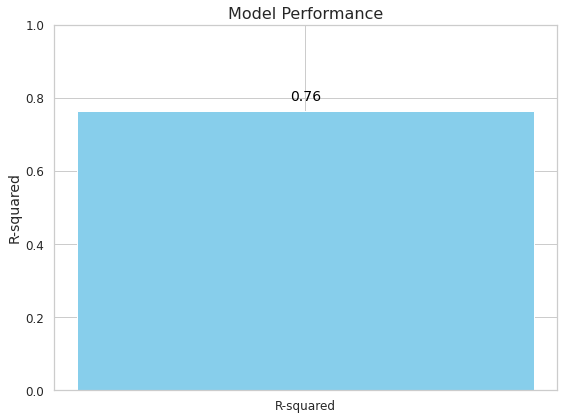

In [24]:
#Display R^2 value which indicates model performance
sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))
plt.bar(['R-squared'], [r2], color='skyblue')
plt.ylim(0, 1) 
plt.ylabel('R-squared', fontsize=14)
plt.title('Model Performance', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.text(0, r2 + 0.02, f'{r2:.2f}', ha='center', va='bottom', fontsize=14, color='black')
plt.tight_layout()
plt.show()